In [1]:
import torch
from custom_transformer import CustomTransformer

In [2]:
torch.manual_seed(1234)

In [3]:
# Testing on random input text before actual python scripts to make sure everything works.
with (open("../data/input.txt", "r") as file):
    text = file.read()

vocab = sorted(set(text))
print(len(vocab))

65


In [4]:
ctoi = {ch : i for i, ch in enumerate(vocab)}
itos = {i : ch for i, ch in enumerate(vocab)}

encode = lambda s : [ctoi[c] for c in s]
decode = lambda s : ''.join([itos[i] for i in s])

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
data = encode(text)
train_size = int(len(data) * .9)
train = data[:train_size]
test = data[train_size:]

def get_batches(dataset, batches, context_len):
    pos = torch.randint(len(dataset) - context_len, (batches,))
    x = torch.stack([torch.tensor(dataset[x : x + context_len], device=device) for x in pos])
    y = torch.stack([torch.tensor(dataset[x + 1 : x + context_len + 1], device=device) for x in pos])

    return x,y

cpu


In [6]:
CONTEXT_LEN = 32
BLOCK_COUNT = 8
EMBED_DIM = 128
HEAD_SIZE = 32
LEARNING_RATE = 1e-3
BATCH_COUNT = 128

transformer = CustomTransformer(len(vocab), CONTEXT_LEN, EMBED_DIM, HEAD_SIZE, BLOCK_COUNT)
optimizer = torch.optim.Adam(transformer.parameters(), lr=LEARNING_RATE)

In [7]:
loss_history = []
for i in range(50):
    train_in, train_target = get_batches(train, BATCH_COUNT, CONTEXT_LEN)

    logits, loss = transformer(train_in, train_target)
#    print(logits.shape)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
print(loss_history[-1])

3.3997814655303955


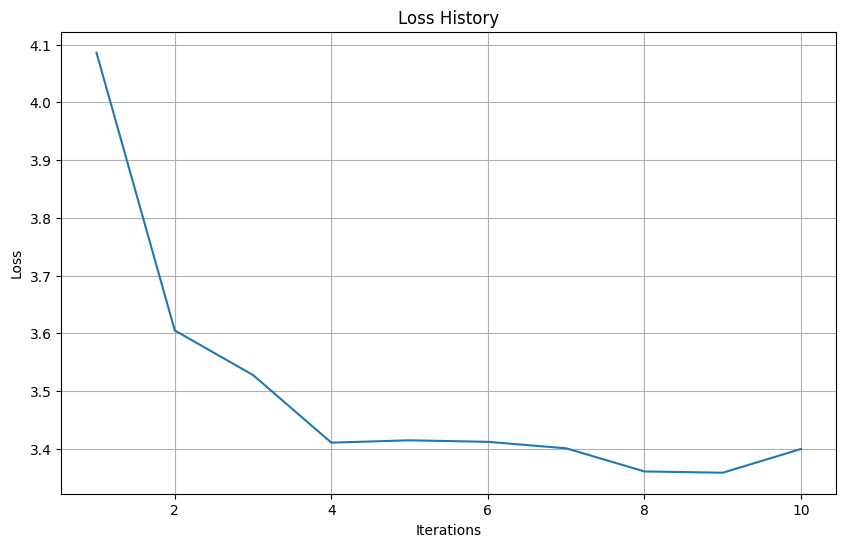

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History')
plt.grid(True)
plt.show()


In [9]:
def complete(ctx, new_len):
    res = [x for x in encode(ctx)]
    for _ in range(new_len):
        ctx = torch.tensor([res[-CONTEXT_LEN:]])
        prob, loss = transformer(ctx, None) # Returns a tensor of size (1, W, EM)
        prob = prob.squeeze(0)
        prob = torch.softmax(prob, dim=-1) # (1, W, EM)
        pred = torch.multinomial(prob, 1) # (1, W, 1)
        res.append(pred[-1, 0].item())
    return decode(res)

In [10]:
print(complete(text[100:150], 16))

 are all resolved rather to die than to famish?

AeaMaaa
 eoejnFor
